In [48]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import math

survey_data = pd.read_csv('survey.csv')
survey_data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [49]:
steps_data = pd.read_csv('steps.csv', sep=';')
steps_data.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df = pd.merge(steps_data, survey_data, on = 'id') #'id' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [51]:
df['mean_steps'] = df.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1)
#From first date until end date. axis=0 takes row-wise mean

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


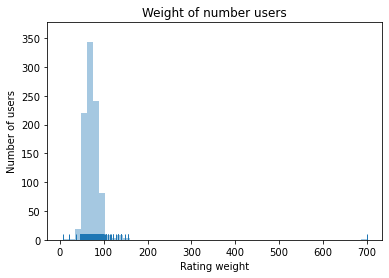

In [52]:
sns.distplot(df['weight'].dropna(), kde=False, rug=True) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of number users')
plt.xlabel('Rating weight')
plt.ylabel('Number of users')
plt.show()

In [53]:
df = df[(df['weight'] < 200) & (df['weight'] > 40)]

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


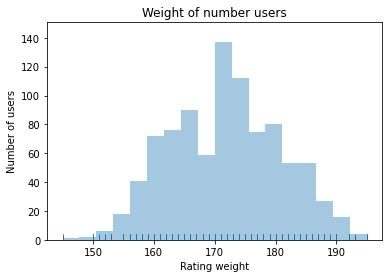

In [54]:
sns.distplot(df['height'].dropna(), kde=False, rug=True)
#Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of number users')
plt.xlabel('Rating weight')
plt.ylabel('Number of users')
plt.show()

In [55]:
#try to get the mean from each runner in the dataframe.
df['mean_steps'] = df.mean(axis=1)
mean_steps = df['mean_steps']
print(mean_steps)

0       9908.780826
1       5520.712564
2       8033.946297
3       2944.661538
4       4873.452160
           ...     
924     5970.228164
925     4393.033571
926     9798.247994
927    14791.961828
928     7327.590679
Name: mean_steps, Length: 923, dtype: float64


/var/folders/zx/j5f34bx55994s2bdj527r21c0000gn/T/ipykernel_27805/736624869.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['mean_steps'] = df.mean(axis=1)


In [56]:
df = df[df['height'] > 140]

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


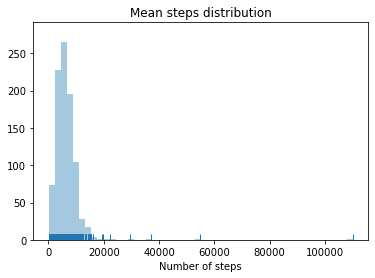

In [57]:
sns.distplot(df['mean_steps'].dropna(), kde=False, rug=True)
plt.title('Mean steps distribution')
plt.xlabel('Number of steps')
plt.show()
#I notice that there are some outliers

In [58]:
df = df[df['mean_steps'] < 30000]

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


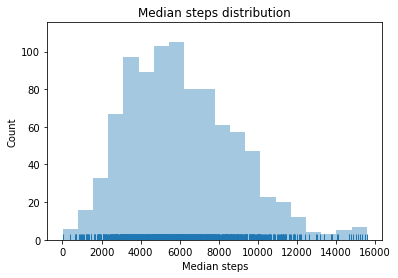

In [59]:
df['median_steps'] = df.loc[:,'20-6-2013':'13-5-2014'].median(axis=1)
sns.distplot(df['median_steps'].dropna(), kde=False, rug=True) #I need to drop the NA's for the plot
plt.title('Median steps distribution')
plt.xlabel('Median steps')
plt.ylabel('Count')
plt.show()

# Assigment:
#### Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)

In [60]:
#all_steps = df2(axis=1)
#print(all_steps)
number_steps = df.dropna(axis=1)
print(number_steps)

df['median'] = df.median(axis=1)
median_steps = df['median']

df['var'] = df.var(axis=1)
variance_steps = df['var']

print(df)
print(median_steps)
print(variance_steps)

      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight    mean

/var/folders/zx/j5f34bx55994s2bdj527r21c0000gn/T/ipykernel_27805/2141674006.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['median'] = df.median(axis=1)
/var/folders/zx/j5f34bx55994s2bdj527r21c0000gn/T/ipykernel_27805/2141674006.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['var'] = df.var(axis=1)


In [61]:
df['bmi'] = df['weight'] / (df["height"]/100)**2

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


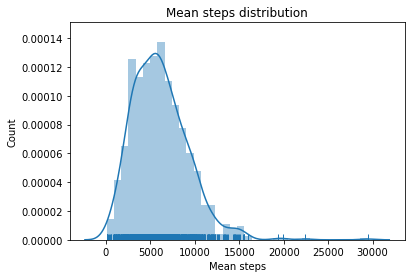

In [62]:
sns.distplot(df['mean_steps'].dropna(), rug=True) #I need to drop the NA's for the plot
plt.title('Mean steps distribution')
plt.xlabel('Mean steps')
plt.ylabel('Count')
plt.show()

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


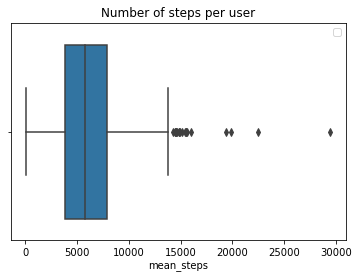

In [63]:
sns.boxplot(df['mean_steps'].dropna())
plt.title('Number of steps per user')
#plt.axvline(median_steps, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
#plt.axvline(variance_steps, color='purple', label='variance') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

In [64]:
print(df['mean_steps'].describe())

count      919.000000
mean      6105.713616
std       3176.841570
min         55.800000
25%       3809.983635
50%       5784.307511
75%       7872.061782
max      29444.839319
Name: mean_steps, dtype: float64


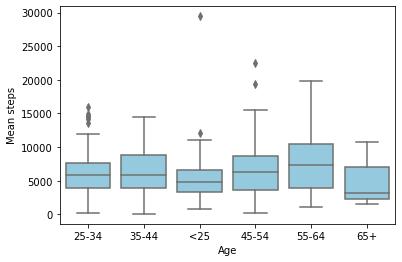

In [65]:
sns.boxplot(x='age', y='mean_steps', data=df, color='skyblue')
plt.ylabel('Mean steps')
plt.xlabel('Age')
plt.show()

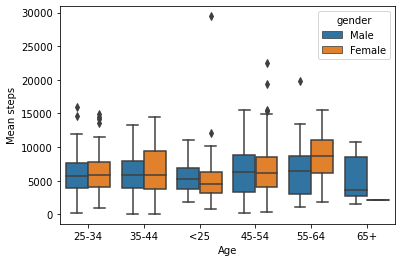

In [66]:
sns.boxplot(x="age", y="mean_steps", hue="gender", data=df)
plt.ylabel("Mean steps")
plt.xlabel("Age")
plt.show()

# Result
#### I tried to get this far but it did not work out as I hoped unfortunately.
#### I did find the mean, median and variance of each user, but plotting them together was quite hard.

# Part 2
## To do:
#### Make a scatterplot matrix of the numerical variables
#### Make a correlation matrix of the numerical variables
#### Describe and interpret the results

Numerical variables:
-mean_steps
-hh size
-bmi
-height
-weight

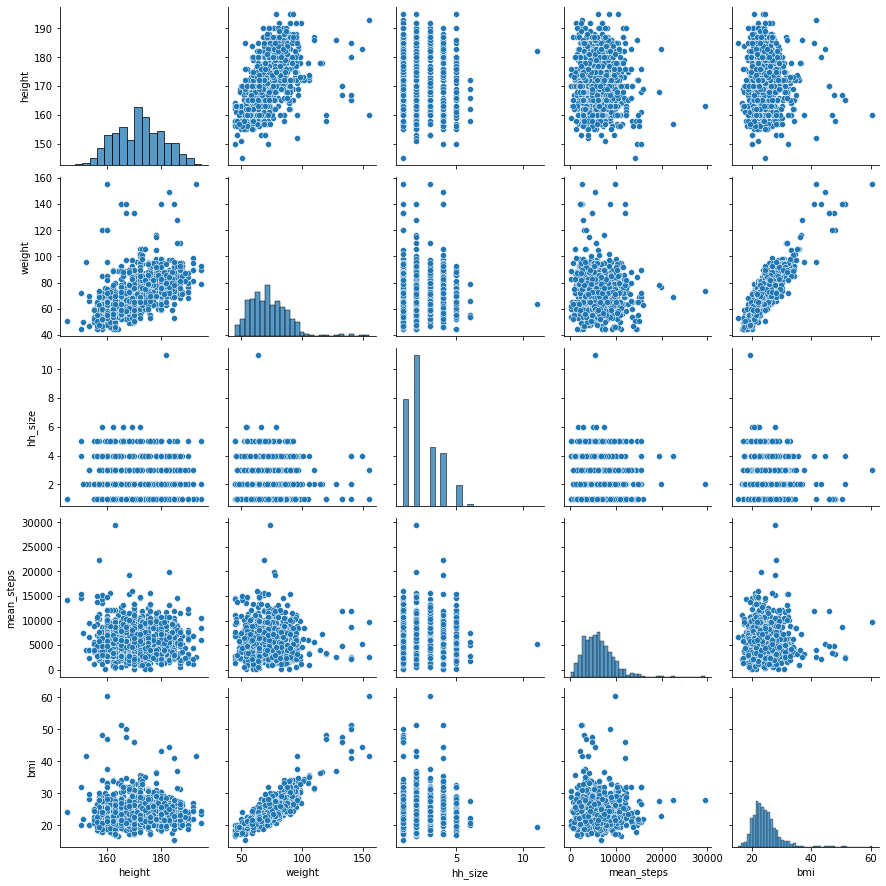

In [67]:
df_numerical = df[['height','weight','hh_size','mean_steps', 'bmi']]
sns.pairplot(df_numerical)
plt.show()

In [68]:
age = df["age"]
height = df["height"]
hh_size = df["hh_size"]
education = df["education"]
weight = df["weight"]
print(age)
print(height)

0      25-34
1      35-44
2      25-34
3        <25
4      25-34
       ...  
924    45-54
925      <25
926    35-44
927    55-64
928    25-34
Name: age, Length: 919, dtype: object
0      178.0
1      180.0
2      180.0
3      178.0
4      167.0
       ...  
924    165.0
925    192.0
926    181.0
927    172.0
928    180.0
Name: height, Length: 919, dtype: float64


#### Make a correlation matrix of the numerical variables

In [69]:
df_numerical.corr()

,height,weight,hh_size,mean_steps,bmi
height,1.000000,0.508051,-0.054854,-0.068106,0.019900
weight,0.508051,1.000000,0.005111,-0.067990,0.866345
hh_size,-0.054854,0.005111,1.000000,0.030042,0.035814
mean_steps,-0.068106,-0.067990,0.030042,1.000000,-0.036010
bmi,0.019900,0.866345,0.035814,-0.036010,1.000000


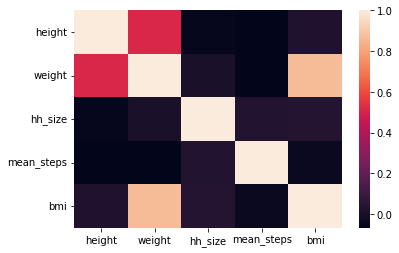

In [70]:
sns.heatmap(df_numerical.corr());

In [71]:
corr = df[['height','weight','hh_size','mean_steps', 'bmi']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,height,weight,hh_size,mean_steps,bmi
height,1.000000,0.508051,-0.054854,-0.068106,0.019900
weight,0.508051,1.000000,0.005111,-0.067990,0.866345
hh_size,-0.054854,0.005111,1.000000,0.030042,0.035814
mean_steps,-0.068106,-0.067990,0.030042,1.000000,-0.036010
bmi,0.019900,0.866345,0.035814,-0.036010,1.000000


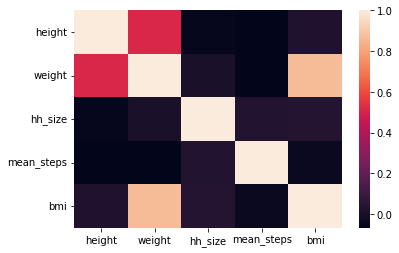

In [72]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

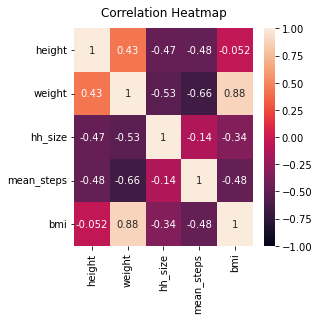

In [73]:
plt.figure(figsize=(4, 4))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

If I look at the correlation heatmap I see multiple correlations. I see some slight correlation between weight and hight with a score of 0,021. I also notice theat weight and the bmi are also strongly correlated because it has a correlation score of 0,96.

In [74]:
education_1_dummies = pd.get_dummies(df['education_1'])
df = pd.concat([df, education_1_dummies], axis=1) 

age_dummies = pd.get_dummies(df['age'])
df = pd.concat([df, age_dummies], axis=1) 

gender_dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, gender_dummies], axis=1) 

df.drop(df.loc[:,'20-6-2013':'13-5-2014'], inplace=True, axis=1) #remove steps by date
df

,id,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,...,Primary,Vocational,25-34,35-44,45-54,55-64,65+,<25,Female,Male
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9908.780826,...,0,0,1,0,0,0,0,0,0,1
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5520.712564,...,0,0,0,1,0,0,0,0,0,1
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8033.946297,...,0,0,1,0,0,0,0,0,0,1
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,2944.661538,...,0,0,0,0,0,0,0,1,0,1
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4873.452160,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,5970.228164,...,0,0,0,0,1,0,0,0,1,0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4393.033571,...,0,0,0,0,0,0,0,1,0,1
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,9798.247994,...,0,0,0,1,0,0,0,0,0,1
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,14791.961828,...,0,0,0,0,0,1,0,0,1,0


In [76]:
corr = df.corr()
corr["mean_steps"]

id                     0.028238
hh_size                0.030042
education              0.011182
height                -0.068106
weight                -0.067990
mean_steps             1.000000
median_steps           0.877935
median                 0.911832
var                    0.394004
bmi                   -0.036010
Bachelor              -0.012499
High school            0.069568
Master or doctorate   -0.004920
No degree              0.004184
Primary               -0.010214
Vocational            -0.062174
25-34                 -0.057103
35-44                  0.041947
45-54                  0.057211
55-64                  0.117997
65+                   -0.034371
<25                   -0.093012
Female                 0.063213
Male                  -0.063213
Name: mean_steps, dtype: float64

* height
* weight
* education
* age
* gender

In [77]:
from sklearn.linear_model import LinearRegression #This is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [78]:
y = df['mean_steps'] #We need to take out the rating as our Y-variable
X = df[['height', 'weight', 'Bachelor', 'High school', 'Master or doctorate', 'Primary', 'Vocational', '25-34', '35-44', '45-54', '55-64', '65+', 'Male']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
X_train.head() #The train data

,height,weight,Bachelor,High school,Master or doctorate,Primary,Vocational,25-34,35-44,45-54,55-64,65+,Male
530,175.0,78.0,0,1,0,0,0,0,0,0,0,0,1
548,170.0,55.0,0,0,1,0,0,1,0,0,0,0,0
298,176.0,76.0,1,0,0,0,0,0,0,1,0,0,1
681,181.0,77.0,0,0,1,0,0,0,0,1,0,0,1
248,170.0,64.0,0,0,1,0,0,0,1,0,0,0,0


/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


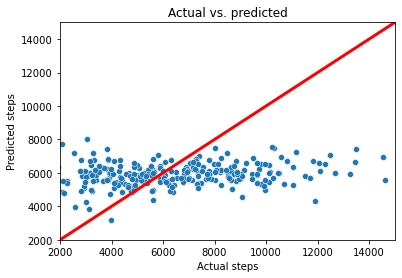

In [79]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual steps')
plt.ylabel('Predicted steps')
plt.title('Actual vs. predicted')
plt.xlim([2000,15000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([2000,15000])
plt.plot([2000, 15000], [2000, 15000], color='red', lw=3) #Plot a diagonal length
plt.show()

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


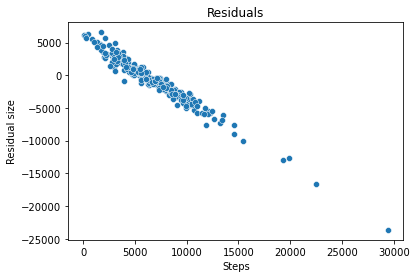

In [80]:
resid = y_test_p - y_test
sns.scatterplot(y_test, resid)
plt.title('Residuals')
plt.xlabel('Steps')
plt.ylabel('Residual size')
plt.show()

In [81]:
r2_score(y_test, y_test_p)

-0.009765352813525752

In [82]:
math.sqrt(mean_squared_error(y_test, y_test_p))

3600.3021769497223

The number is 3600, so the model is typically of by about 3600 steps. If the model would only use the mean and no variables at all, the RMSE would be equal to the standard deviation. The standard deviation is:

In [83]:
df['mean_steps'].std()

3176.8415700468486

Which is lower. Another indication that the model can't predict the mean steps very well.

Made by Laura Osterholt, student number: 1797529